In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import requests
import json
import gmaps
import os
import warnings

# Importing Google maps API key
from api_keys import g_key

vic_subs_path = "Data files/Vic suburb price data till 2019.csv"
vic_subs_df = pd.read_csv(vic_subs_path)

In [2]:
vic_subs_df

,Median House Price - 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-2019,2009-2019,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [3]:
vic_subs_df.columns = vic_subs_df.iloc[0]
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020,change,change,Growth PA
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,2018-2019,2009-2019,NaN
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000,-14,58,4.7
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500,-7,77,5.9
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000,10,33,2.9
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000,-7,79,6
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000,9,39,3.3
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500,11,104,7.4


In [4]:
vic_subs_df = vic_subs_df.iloc[:, 0:13]
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
0,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
1,locality,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median,Median
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [5]:
vic_subs_df = vic_subs_df.drop(vic_subs_df.index[[0,1]])
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
2,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
3,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
4,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
5,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
6,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
801,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
802,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
803,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [6]:
vic_subs_df = vic_subs_df.reset_index(drop=True)
vic_subs_df

,NaN,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,prelim 2020
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [7]:
vic_subs_df = vic_subs_df.rename(columns={np.nan: "Suburb", "prelim 2020": "2020"})
vic_subs_df

,Suburb,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,652000,736000,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,786500,1046500,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,515000,606000,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,456000,575000,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,180000,166000,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,541000,647000,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,297000,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,214000,240000,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [8]:
del vic_subs_df["2009"]
del vic_subs_df["2010"]
vic_subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,-,-,-,-,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [9]:
vic_subs_df = vic_subs_df.replace("-", np.nan)
vic_subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,730000,714000,792500,862500,925000,1187500,1280000,1192500,1030000,1150000
1,ABERFELDIE,994000,852500,947500,1045000,1207500,1300000,1453000,1500000,1390000,1592500
2,AINTREE,NaN,NaN,NaN,NaN,680500,640000,571500,580000,610000,675000
3,AIREYS INLET,680000,634000,664000,625500,680000,715000,737500,869000,985000,1005000
4,AIRPORT WEST,557500,495000,532000,575000,635000,742000,845000,847500,790000,900000
...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500,215000,190000,202500,245000,230000,225000,218000,240000,260000
799,YARRAVILLE,607000,613000,696000,710000,810000,900500,1000000,1045000,971000,950000
800,YARRAWONGA,270000,300000,302500,297000,300500,320000,324500,345000,375000,398000
801,YEA,270000,255000,260000,255000,260000,305000,386500,392500,435500,416500


In [10]:
clean_subs_df = vic_subs_df.dropna(how="any").copy()

In [11]:
clean_subs_df["2011"] = clean_subs_df["2011"].astype(float)
clean_subs_df["2012"] = clean_subs_df["2012"].astype(float)
clean_subs_df["2013"] = clean_subs_df["2013"].astype(float)
clean_subs_df["2014"] = clean_subs_df["2014"].astype(float)
clean_subs_df["2015"] = clean_subs_df["2015"].astype(float)
clean_subs_df["2016"] = clean_subs_df["2016"].astype(float)
clean_subs_df["2017"] = clean_subs_df["2017"].astype(float)
clean_subs_df["2018"] = clean_subs_df["2018"].astype(float)
clean_subs_df["2019"] = clean_subs_df["2019"].astype(float)
clean_subs_df["2020"] = clean_subs_df["2020"].astype(float)

In [12]:
avg_2011 = clean_subs_df["2011"].mean()
avg_2012 = clean_subs_df["2012"].mean()
avg_2013 = clean_subs_df["2013"].mean()
avg_2014 = clean_subs_df["2014"].mean()
avg_2015 = clean_subs_df["2015"].mean()
avg_2016 = clean_subs_df["2016"].mean()
avg_2017 = clean_subs_df["2017"].mean()
avg_2018 = clean_subs_df["2018"].mean()
avg_2019 = clean_subs_df["2019"].mean()
avg_2020 = clean_subs_df["2020"].mean()

sub_stats_df = pd.DataFrame({"2011": avg_2011, "2012": avg_2012, "2013": avg_2013, "2014": avg_2014, "2015":  avg_2015,
                            "2016": avg_2016, "2017": avg_2017, "2018": avg_2018, "2019": avg_2019, "2020":  avg_2020}, index=[0])


sub_stats_df = sub_stats_df.T
sub_stats_df

,0
2011,452562.745098
2012,446039.215686
2013,469134.640523
2014,501422.222222
2015,558584.967320
2016,612204.575163
2017,687077.124183
2018,702504.575163
2019,689012.418301
2020,727133.986928


In [13]:
sub_stats_df = sub_stats_df.reset_index()

In [14]:
sub_stats_df = sub_stats_df.rename(columns={"index": "Year", 0: "Average Value"})
sub_stats_df

,Year,Average Value
0,2011,452562.745098
1,2012,446039.215686
2,2013,469134.640523
3,2014,501422.222222
4,2015,558584.967320
5,2016,612204.575163
6,2017,687077.124183
7,2018,702504.575163
8,2019,689012.418301
9,2020,727133.986928


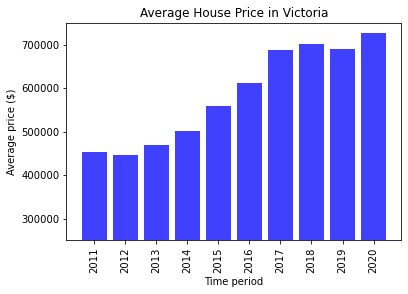

In [15]:
x_axis_data = sub_stats_df["Year"]
y_axis_data = sub_stats_df["Average Value"]

x_axis = np.arange(0, len(x_axis_data))
tick_locations = []

for x in x_axis:
    tick_locations.append(x)

plt.title("Average House Price in Victoria")
plt.xlabel("Time period")
plt.ylabel("Average price ($)")
plt.ylim(ymax = 750000, ymin = 250000)

plt.bar(x_axis, y_axis_data, facecolor="blue", alpha=0.75, align="center")

plt.xticks(tick_locations, x_axis_data, rotation=90)

plt.show()

In [16]:
sorted_subs_df = clean_subs_df.sort_values("2020", ascending=False)
sorted_subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
715,TOORAK,2617500.0,2775000.0,2875000.0,3391000.0,3987500.0,4900000.0,5100000.0,4700000.0,4361000.0,4500000.0
471,MIDDLE PARK,1345000.0,1420500.0,1587500.0,2125000.0,2317000.0,2238500.0,2370000.0,2650000.0,2705000.0,3555000.0
100,BRIGHTON,1720000.0,1789500.0,1802500.0,1940000.0,2302500.0,2740000.0,3050000.0,2879000.0,2600000.0,2825000.0
321,HAWTHORN,1330000.0,1405000.0,1575000.0,1606500.0,1916500.0,2240000.0,2650000.0,2488000.0,2195500.0,2578000.0
583,PORTSEA,1625000.0,1398000.0,1195000.0,1305000.0,1800000.0,1701000.0,1925000.0,2180000.0,1950000.0,2515000.0
...,...,...,...,...,...,...,...,...,...,...,...
527,NHILL,107000.0,110000.0,110000.0,125000.0,128000.0,140000.0,126500.0,149000.0,137000.0,107500.0
476,MINYIP,82500.0,81000.0,73500.0,95000.0,93000.0,82500.0,94000.0,81000.0,114500.0,95000.0
359,JEPARIT,101500.0,59000.0,80500.0,63000.0,89000.0,124000.0,66500.0,77000.0,81000.0,88000.0
72,BEULAH,69000.0,75000.0,42500.0,101000.0,65000.0,65000.0,96000.0,120500.0,77000.0,81000.0


In [17]:
top_subs = sorted_subs_df.loc[:, ["Suburb", "2011", "2015", "2019", "2020"]]

top_subs["Difference %"] = ((top_subs["2020"] - top_subs["2019"]) / top_subs["2019"]) *100

top_subs

,Suburb,2011,2015,2019,2020,Difference %
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,3.187342
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,31.423290
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,8.653846
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,17.422000
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,28.974359
...,...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0,-21.532847
476,MINYIP,82500.0,93000.0,114500.0,95000.0,-17.030568
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,8.641975
72,BEULAH,69000.0,65000.0,77000.0,81000.0,5.194805


In [18]:
top_5_2020 = top_subs.head().copy()
top_5_2020

,Suburb,2011,2015,2019,2020,Difference %
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,3.187342
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,31.423290
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,8.653846
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,17.422000
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,28.974359


In [19]:
top_subs_change = top_subs.sort_values("Difference %", ascending=False)
top_subs_change

,Suburb,2011,2015,2019,2020,Difference %
515,NATIMUK,142500.0,161000.0,148500.0,370000.0,149.158249
338,HOPETOUN,55500.0,75000.0,66000.0,142500.0,115.909091
447,MANIFOLD HEIGHTS,449000.0,489500.0,715000.0,1437500.0,101.048951
582,PORTLAND NORTH,215000.0,330000.0,276000.0,541000.0,96.014493
184,CORINELLA,282500.0,370000.0,357500.0,660000.0,84.615385
...,...,...,...,...,...,...
240,EAST MELBOURNE,1737500.0,2750000.0,3413500.0,2350000.0,-31.155705
586,PRINCES HILL,967500.0,1280000.0,2035000.0,1375500.0,-32.407862
573,POOWONG,208000.0,240000.0,443000.0,285000.0,-35.665914
6,ALBERT PARK,1390000.0,1700000.0,1965000.0,1110000.0,-43.511450


In [20]:
city = "Natimuk"
gmaps.configure(api_key=g_key)

target_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={city}&key={g_key}"

In [21]:
geo_data = requests.get(target_url).json()

print(json.dumps(geo_data, indent=2, sort_keys=True))

{
  "results": [
    {
      "address_components": [
        {
          "long_name": "Natimuk",
          "short_name": "Natimuk",
          "types": [
            "locality",
            "political"
          ]
        },
        {
          "long_name": "Horsham Rural City",
          "short_name": "Horsham",
          "types": [
            "administrative_area_level_2",
            "political"
          ]
        },
        {
          "long_name": "Victoria",
          "short_name": "VIC",
          "types": [
            "administrative_area_level_1",
            "political"
          ]
        },
        {
          "long_name": "Australia",
          "short_name": "AU",
          "types": [
            "country",
            "political"
          ]
        },
        {
          "long_name": "3409",
          "short_name": "3409",
          "types": [
            "postal_code"
          ]
        }
      ],
      "formatted_address": "Natimuk VIC 3409, Australia",
      "geome

In [22]:
top_5_2020["Lat"] = ""
top_5_2020["Lng"] = ""
top_5_2020

,Suburb,2011,2015,2019,2020,Difference %,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,3.187342,,
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,31.423290,,
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,8.653846,,
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,17.422000,,
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,28.974359,,


In [23]:
params = {"key": g_key}

for index, row in top_5_2020.iterrows():
    
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    suburb = row["Suburb"]
    
    params["address"] = f"{suburb}, Vic"
    
    subs_lat_lng = requests.get(base_url, params=params)
    
    subs_lat_lng = subs_lat_lng.json()
    
    top_5_2020.loc[index, "Lat"] = subs_lat_lng["results"][0]["geometry"]["location"]["lat"]
    top_5_2020.loc[index, "Lng"] = subs_lat_lng["results"][0]["geometry"]["location"]["lng"]
    

top_5_2020


,Suburb,2011,2015,2019,2020,Difference %,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,3.187342,-37.8417,145.014
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,31.423290,-37.8519,144.963
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,8.653846,-37.9043,144.993
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,17.422000,-37.8226,145.035
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,28.974359,-38.32,144.713


In [24]:
marker_locations = top_5_2020[["Lat", "Lng"]]

In [25]:
fig = gmaps.figure()

markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)

fig

Figure(layout=FigureLayout(height='420px'))

In [26]:
heat_top_subs = top_subs.copy()

In [27]:
heat_top_subs["Lat"] = ""
heat_top_subs["Lng"] = ""
heat_top_subs

,Suburb,2011,2015,2019,2020,Difference %,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,3.187342,,
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,31.423290,,
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,8.653846,,
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,17.422000,,
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,28.974359,,
...,...,...,...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0,-21.532847,,
476,MINYIP,82500.0,93000.0,114500.0,95000.0,-17.030568,,
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,8.641975,,
72,BEULAH,69000.0,65000.0,77000.0,81000.0,5.194805,,


In [28]:
heat_subs_params = {"key": g_key}

for index, row in heat_top_subs.iterrows():
    
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    suburb = row["Suburb"]
    
    heat_subs_params["address"] = f"{suburb}, Vic"
    
    heat_subs_lat_lng = requests.get(base_url, params=heat_subs_params)
    
    heat_subs_lat_lng = heat_subs_lat_lng.json()
    
    try:
        heat_top_subs.loc[index, "Lat"] = heat_subs_lat_lng["results"][0]["geometry"]["location"]["lat"]
        heat_top_subs.loc[index, "Lng"] = heat_subs_lat_lng["results"][0]["geometry"]["location"]["lng"]
    
    except:
        heat_top_subs.loc[index, "Lat"] = np.nan
        heat_top_subs.loc[index, "Lng"] = np.nan

In [29]:
heat_top_subs.isnull().values.any()

False

In [30]:
heat_top_subs

,Suburb,2011,2015,2019,2020,Difference %,Lat,Lng
715,TOORAK,2617500.0,3987500.0,4361000.0,4500000.0,3.187342,-37.8417,145.014
471,MIDDLE PARK,1345000.0,2317000.0,2705000.0,3555000.0,31.423290,-37.8519,144.963
100,BRIGHTON,1720000.0,2302500.0,2600000.0,2825000.0,8.653846,-37.9043,144.993
321,HAWTHORN,1330000.0,1916500.0,2195500.0,2578000.0,17.422000,-37.8226,145.035
583,PORTSEA,1625000.0,1800000.0,1950000.0,2515000.0,28.974359,-38.32,144.713
...,...,...,...,...,...,...,...,...
527,NHILL,107000.0,128000.0,137000.0,107500.0,-21.532847,-36.3328,141.65
476,MINYIP,82500.0,93000.0,114500.0,95000.0,-17.030568,-36.4577,142.594
359,JEPARIT,101500.0,89000.0,81000.0,88000.0,8.641975,-36.1331,141.944
72,BEULAH,69000.0,65000.0,77000.0,81000.0,5.194805,-35.9381,142.42


In [41]:
subs_loc = heat_top_subs[["Suburb", "Lat", "Lng"]]

In [42]:
subs_loc.to_csv("Data files/subs lat and lng.csv", encoding="utf-8", index=False, header=True)

In [31]:
locations = heat_top_subs[["Lat", "Lng"]]

price = heat_top_subs["2020"]/100000

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [32]:
locations = heat_top_subs[["Lat", "Lng"]]

price = heat_top_subs["2015"]/100000

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
locations = heat_top_subs[["Lat", "Lng"]]

price = heat_top_subs["2011"]/100000

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=price, dissipating=False, max_intensity=10, point_radius=0.05)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
subs_df = clean_subs_df.copy()
subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0
...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0


In [35]:
subs_df["Postcode"] = ""
subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,


In [37]:
new_params = {"key": g_key}

for index, row in subs_df.iterrows():
    
    base_url = "https://maps.googleapis.com/maps/api/geocode/json?"
    
    suburb = row["Suburb"]
    
    new_params["address"] = f"{suburb}, Vic"
    
    subs_postcode = requests.get(base_url, params=new_params)
    
    subs_postcode = subs_postcode.json()
    
    try:
        subs_df.loc[index, "Postcode"] = subs_postcode["results"][0]["address_components"][4]["long_name"]
    
    except:
        subs_df.loc[index, "Postcode"] = np.nan

In [38]:
subs_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,3067
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,3040
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,3231
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,3042
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,3021
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,3971
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,3013
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,3730
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,3717


In [39]:
all_post_df = subs_df.dropna().copy()
all_post_df

,Suburb,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Postcode
0,ABBOTSFORD,730000.0,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1030000.0,1150000.0,3067
1,ABERFELDIE,994000.0,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1453000.0,1500000.0,1390000.0,1592500.0,3040
3,AIREYS INLET,680000.0,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1005000.0,3231
4,AIRPORT WEST,557500.0,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,847500.0,790000.0,900000.0,3042
5,ALBANVALE,317000.0,310000.0,313000.0,326500.0,345000.0,439000.0,526500.0,546000.0,512000.0,563000.0,3021
...,...,...,...,...,...,...,...,...,...,...,...,...
798,YARRAM,195500.0,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,3971
799,YARRAVILLE,607000.0,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,950000.0,3013
800,YARRAWONGA,270000.0,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,398000.0,3730
801,YEA,270000.0,255000.0,260000.0,255000.0,260000.0,305000.0,386500.0,392500.0,435500.0,416500.0,3717


In [ ]:
all_post_df.to_csv("Data files/prices with postcode.csv", encoding="utf-8", index=False, header=True)